In [1]:
import numpy as np
from collections import defaultdict
import itertools
import re 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import islice, product
from copy import copy
from tqdm import tqdm

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('figure', **{'dpi': 300})

In [2]:
!ls corpora

AnnaKarenina.txt   WarAndPeace.txt    WarAndPeaceEng.txt


In [3]:
def clean_text_from_file(file, func_check_lang):
    text = open(file).read()
    new_text = ''
    for sym in text:
        if (func_check_lang(sym) and sym.isalpha()) or sym == ' ':
            new_text += sym.lower()
        elif sym in ".!,?":
            new_text += " "
    new_text = new_text.replace("  ", " ")
    new_text = new_text.replace("   ", " ")
    new_text = new_text.replace("    ", " ")
    return new_text

def has_cyrillic(text):
    return bool(re.search('[а-яА-Я]', text))

In [4]:
cleaner_war_peace = clean_text_from_file("corpora/WarAndPeace.txt", has_cyrillic)

In [5]:
def window(seq, n=1):
    it = iter(seq)
    result = tuple(islice(it, n))
    if len(result) == n:
        yield result
    for elem in it:
        result = result[1:] + (elem,)
        yield result

In [6]:
def calc_stats_from_string(text, win_size=1):
    stats = defaultdict(lambda: 0)
    
    for sym in window(text, win_size):
        #print(sym)
        sym = ''.join(sym)
        stats[sym.lower()] += 1        
    n = sum(stats.values())
    return stats

In [7]:
war_peace_rus = calc_stats_from_string(cleaner_war_peace)

In [8]:
alpha = [chr(sym) for sym in range(ord('а'), ord('я') + 1)]
alpha.append(" ")
shuff = alpha.copy()
np.random.shuffle(shuff)

In [9]:
transposition_enc = dict(zip(alpha, shuff))

In [10]:
transposition_enc

{'а': 'д',
 'б': 'о',
 'в': 'ф',
 'г': 'ш',
 'д': 'н',
 'е': 'г',
 'ж': 'з',
 'з': 'ы',
 'и': 'р',
 'й': 'ъ',
 'к': 'я',
 'л': 'ч',
 'м': 'л',
 'н': 'с',
 'о': ' ',
 'п': 'к',
 'р': 'э',
 'с': 'м',
 'т': 'у',
 'у': 'в',
 'ф': 'б',
 'х': 'ц',
 'ц': 'й',
 'ч': 'т',
 'ш': 'е',
 'щ': 'щ',
 'ъ': 'п',
 'ы': 'и',
 'ь': 'ю',
 'э': 'а',
 'ю': 'ь',
 'я': 'х',
 ' ': 'ж'}

In [11]:
def encrypt_text(text, transposition):
    enc_text = ""
    for sym in itertools.chain.from_iterable(text):
        
        if sym.lower() in transposition.keys():
            enc_text += transposition[sym.lower()]
        else:
            enc_text += sym
    return enc_text    

In [12]:
cleaner_text = clean_text_from_file("text.txt", has_cyrillic)
enc_text = encrypt_text(cleaner_text, transposition_enc)

In [13]:
cleaner_text

'так не переставая говорили об алексее александровиче осуждая его и смеясь над ним между тем как он заступив дорогу пойманному им члену государственного совета и ни на минуту не прекращая своего изложения чтобы не упустить его по пунктам излагал ему финансовый проект почти в одно и то же время как жена ушла от алексея александровича с ним случилось и самое горькое для служащего человека событие прекращение восходящего служебного движения прекращение это совершилось и все ясно видели это но сам алексей александрович не сознавал еще того что карьера его кончена столкновение ли со стремовым несчастье ли с женой или просто то что алексей александрович дошел до предела который ему был предназначен но для всех в нынешнем году стало очевидно что служебное поприще его кончено он еще занимал важное место он был членом многих комиссий и комитетов но он был человеком который весь вышел и от которого ничего более не ждут что бы он ни говорил что бы ни предлагал его слушали так как будто то что он 

In [14]:
enc_text

'удяжсгжкгэгмудфдхжш ф эрчрж ождчгямггждчгямдснэ фртгж мвзндхжгш жржмлгхмюжсднжсрлжлгзнвжуглжядяж сжыдмувкрфжн э швжк ълдсс лвжрлжтчгсвжш мвндэмуфгсс ш жм фгуджржсржсджлрсвувжсгжкэгяэдщдхжмф гш жрыч згсрхжту оижсгжвквмуруюжгш жк жквсяудлжрычдшдчжглвжбрсдсм фиъжкэ гяужк туржфж нс жржу жзгжфэглхжядяжзгсджвечдж уждчгямгхждчгямдснэ фртджмжсрлжмчвтрч мюжржмдл гжш эюя гжнчхжмчвздщгш жтгч фгяджм оиургжкэгяэдщгсргжф мц нхщгш жмчвзгос ш жнфрзгсрхжкэгяэдщгсргжау жм фгэерч мюжржфмгжхмс жфрнгчржау жс жмдлждчгямгъждчгямдснэ фртжсгжм ысдфдчжгщгжу ш жту жядэюгэджгш жя стгсджму чяс фгсргжчржм жмуэгл филжсгмтдмуюгжчржмжзгс ъжрчржкэ му жу жту ждчгямгъждчгямдснэ фртжн егчжн жкэгнгчджя у эиъжглвжоичжкэгнсдысдтгсжс жнчхжфмгцжфжсисгесглжш нвжмудч ж тгфрнс жту жмчвзгос гжк кэрщгжгш жя стгс ж сжгщгжыдсрлдчжфдзс гжлгму ж сжоичжтчгс лжлс шрцжя лрммръжржя лругу фжс ж сжоичжтгч фгя лжя у эиъжфгмюжфиегчжрж ужя у э ш жсртгш жо чггжсгжзнвужту жоиж сжсржш ф эрчжту жоижсржкэгнчдшдчжгш жмчведчржудяжядяжовну жу жту ж сж

In [15]:
def decrypt_text(enc_text, text_for_stat, stats_in_peace, win_size=1):
    stats_enc_text = calc_stats_from_string(text_for_stat, win_size)
    stats_enc_text = dict(sorted(stats_enc_text.items(), key=lambda item: item[1], reverse=True))
    stats = dict(sorted(stats_in_peace.items(), key=lambda item: item[1], reverse=True))
    transposition_table = dict(zip(stats_enc_text.keys(), stats.keys()))
    dec_text = ""
    for sym in enc_text:
        if sym in transposition_table.keys():
            dec_text += transposition_table[sym]
        else:
            dec_text += sym
    return dec_text, transposition_table

In [16]:
def count_right_sym(enc_table, dec_table):
    count_right = 0
    for k, v in enc_table.items():
        if v in dec_table.keys():
            if dec_table[v] == k:
                count_right+=1
    return count_right

In [17]:
dec_text, key_table = decrypt_text(enc_text, enc_text, war_peace_rus)

In [18]:
dec_text

'сик еа паратсивиь говорнлн об илактаа илактиемровняа отдымиь аго н туаьтч еим ену уаымд сау кик ое йитсдпнв морогд пожуиееоуд ну ялаед готдмиртсваееого товаси н ен еи унедсд еа пракришиь твоаго нйлоыаень ясобз еа дпдтснсч аго по пдексиу нйлигил ауд щнеиетовзж проакс поясн в омео н со ыа врауь кик ыаеи дхли ос илактаь илактиемровняи т ену тлдянлотч н тиуоа горчкоа мль тлдыишаго яаловаки тобзсна пракришаена вотюомьшаго тлдыабеого мвныаень пракришаена цсо товархнлотч н вта ьтео внмалн цсо ео тиу илактаж илактиемровня еа тойеивил аша сого ясо кирчари аго коеяаеи тсолкеоваена лн то тсрауовзу еатяитсча лн т ыаеож нлн протсо со ясо илактаж илактиемровня мохал мо прамали косорзж ауд бзл прамеийеияае ео мль втаю в езеахеау гомд тсило ояавнмео ясо тлдыабеоа попрнша аго коеяаео ое аша йиенуил виыеоа уатсо ое бзл ялаеоу уеогню коунттнж н коунсасов ео ое бзл яаловакоу косорзж ватч взхал н ос косорого еняаго болаа еа ымдс ясо бз ое ен говорнл ясо бз ен прамлигил аго тлдхилн сик кик бдмсо со ясо ое 

In [19]:
count_right_sym(transposition_enc, key_table)

9

[Text(0.5, 0, 'буква'),
 Text(0, 0.5, 'сколько раз встретилась буква'),
 Text(0.5, 1.0, 'Статистика "text"')]

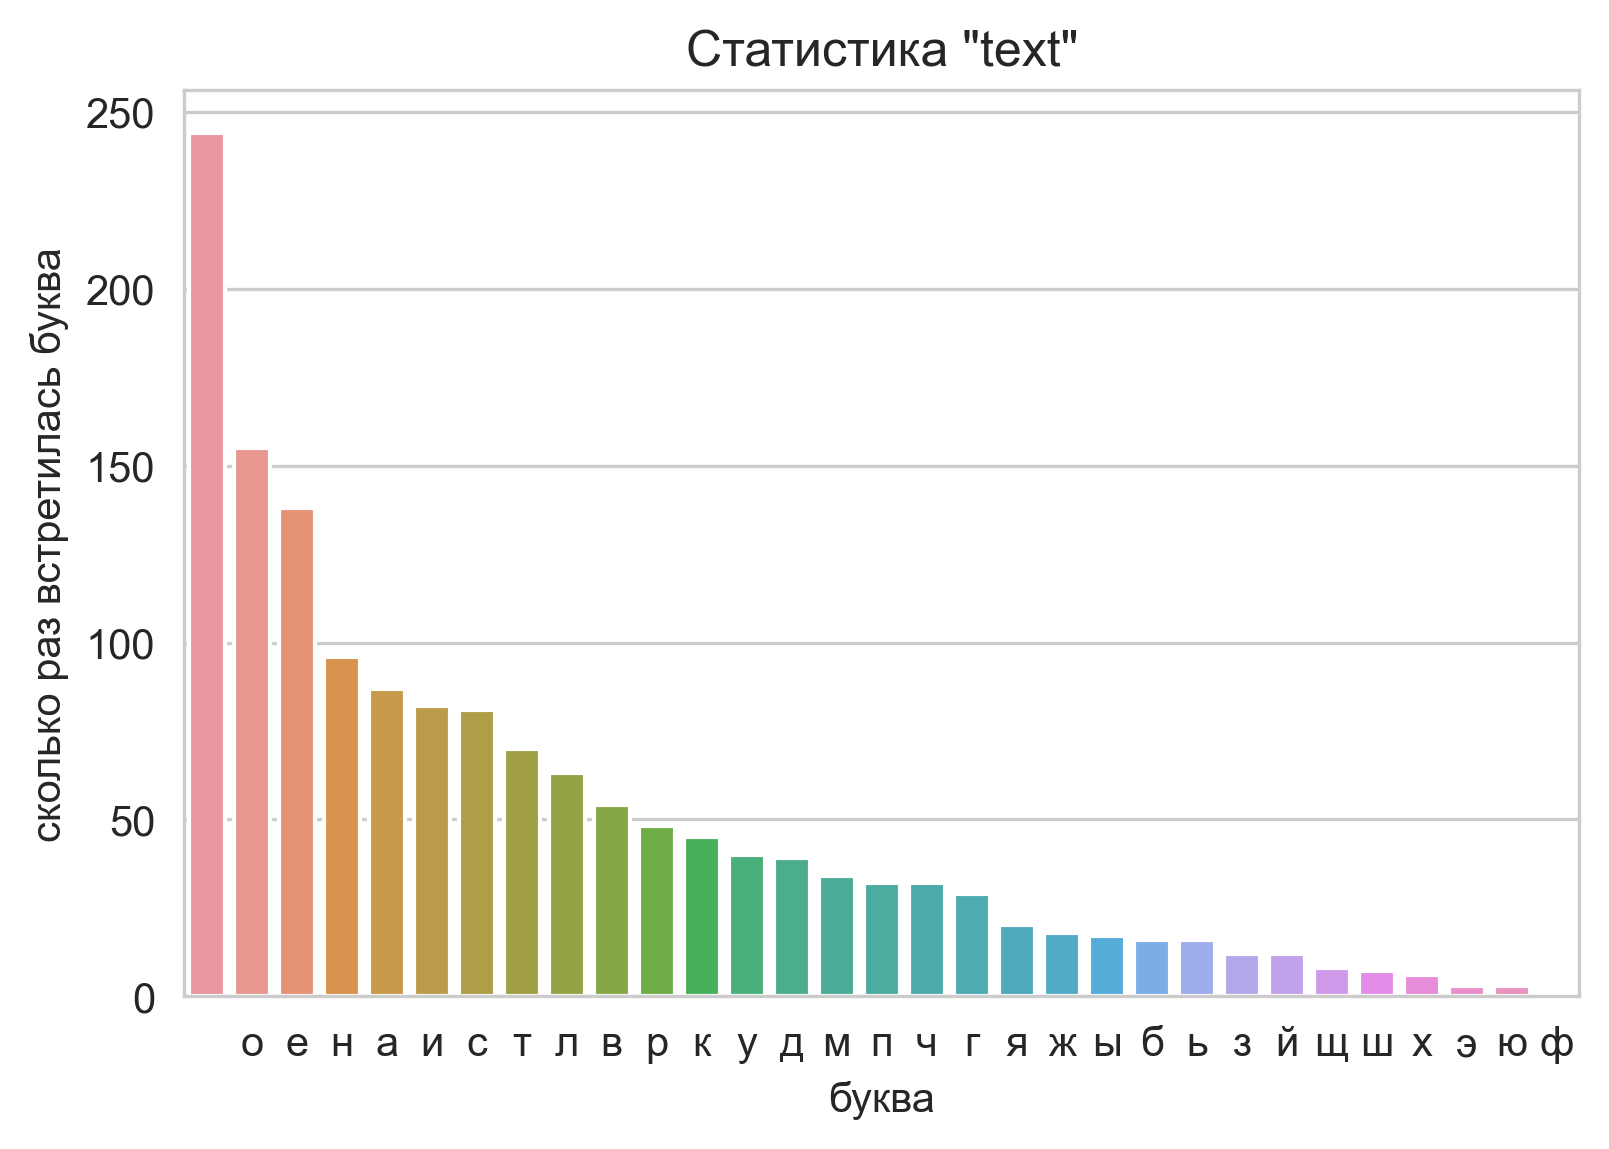

In [20]:
stats_org_text = calc_stats_from_string(cleaner_text)
stats_org_text = dict(sorted(stats_org_text.items(), key=lambda item: item[1], reverse=True))
stats_df = pd.DataFrame(stats_org_text.items())
ax = sns.barplot(x=0, y=1, data=stats_df)
ax.set(xlabel = 'буква', ylabel='сколько раз встретилась буква', title='Статистика "text"')

[Text(0.5, 0, 'буква'),
 Text(0, 0.5, 'сколько раз встретилась буква'),
 Text(0.5, 1.0, 'Статистика "Войны и мир"')]

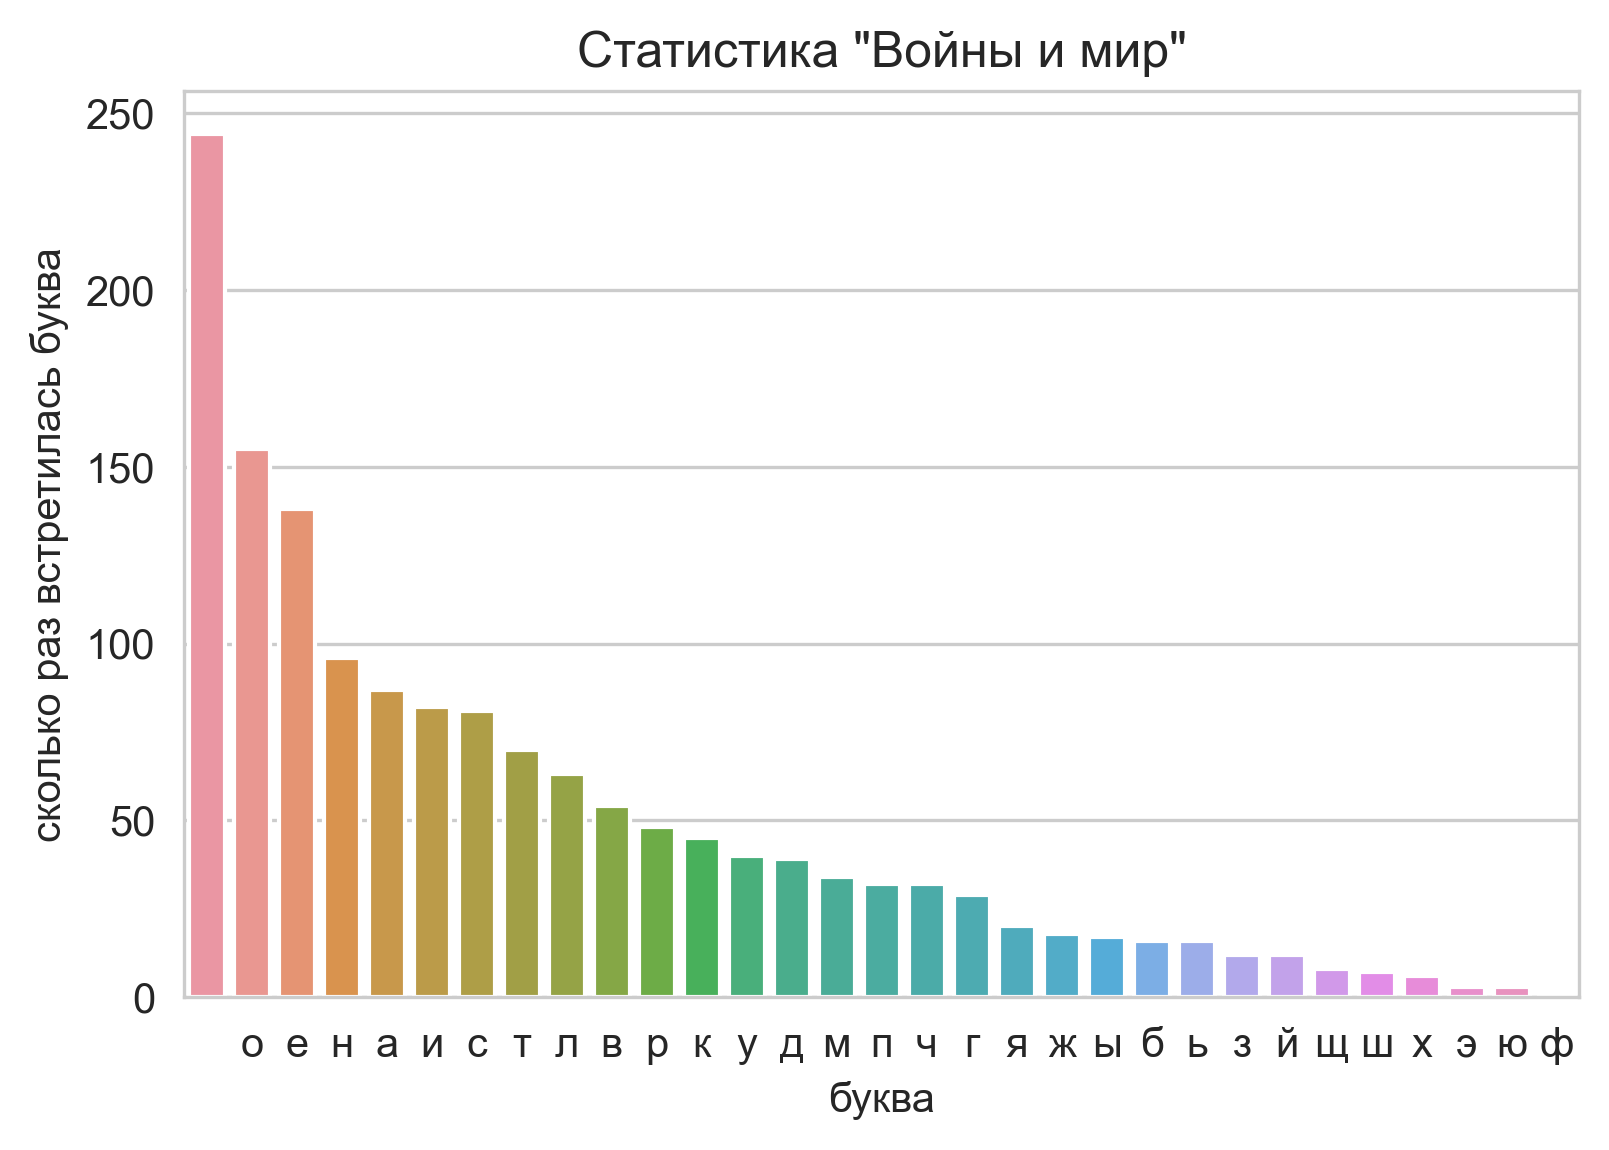

In [21]:
stats_war_text = calc_stats_from_string(cleaner_war_peace)
stats_war_text = dict(sorted(stats_war_text.items(), key=lambda item: item[1], reverse=True))
stats_df = pd.DataFrame(stats_org_text.items())
ax = sns.barplot(x=0, y=1, data=stats_df)
ax.set(xlabel = 'буква', ylabel='сколько раз встретилась буква', title='Статистика "Войны и мир"')

# Биграммы

In [22]:
war_peace_rus_bigram = calc_stats_from_string(cleaner_war_peace, 2)
war_peace_rus_bigram = dict(sorted(war_peace_rus_bigram.items(), key=lambda item: item[1], reverse=False))

In [23]:
enc_text_bigram_stats = calc_stats_from_string(enc_text, 2)
enc_text_bigram_stats = dict(sorted(enc_text_bigram_stats.items(), key=lambda item: item[1], reverse=False))

In [24]:
sub_table = list(war_peace_rus_bigram.keys())[::-1]

In [25]:
sub_table = sub_table[: len(enc_text_bigram_stats.keys())][::-1]

In [26]:
dec_text = len(enc_text) * ["&"]

Сначала декодируем самые редко встречающиеся пары символов, а потом их перетираем теми парами которые имеют наибольшую частоту

In [27]:
for i, bigram in enumerate(enc_text_bigram_stats.keys()):
    j, k = 0, 1
    for enc_bigram in window(enc_text, 2):
        e_b = ''.join(enc_bigram)
        if bigram == e_b:
            dec_text[j] = sub_table[i][0]
            dec_text[k] = sub_table[i][1]
        j+=1
        k+=1

In [28]:
''.join(dec_text)

'те а и оий я еетро на чюо п жл итеи и  ителагсунасри  иогиерот о  е гсо за  аа оалилтионмсал с ь прнвя савд д уенотомеп г сто калос оон нидиечя е о с о  налт   а  а  бикмееоа и оонеоля ре ант о кры р оорко втьа и рибя   зот о оо ожялтеа крльс иатконслм ганаивтоо не томв  поь т о  п о ри ой крл с зр о бршл ь рл итеи ро ителагсунасе е а оае  звюыниз  е асои  нчекаи дыре  огаот о о тнане е кть  и оонеоло оои ониукрыот о   орер с о доср оортоонеоло оои т о  налтоюыниз  поти дн о оси т пт о  о  аал итеи во ителагсунасеа и  кжм е иатои  в о о о  сбеио бт о  аар о е  втв са оои о е о   й кнаяаа вечея уи о е мр  св ко пооня о  о о о  итеи во ителагсунасе дся радо оо и т л а вчлвоткоерьртоо ам ом р оа о дырпот мпоа йовуовал ниое   ио  риосд о о о   орер си омгояои т о  аар  о  потои н нот ипотх си ивя о  перьраос  сали снкмл атн ьов  п атнже ваа о  перьрао тнанеаал а вчлвполезпояя р  п рл а вуе о  орт о рэсти  и иив ко о рьь па  п на чюрао о рьа  поо альс иат о   зш и пме л с ерди о  о о о  пт

Даже не считая метрику видно, что получилось хуже.

# MCMC

1. Меняем местами две случайные буквы в ключе расшифровки
2. Оцениваем вероятность получить такой текст. У нас есть статистика, построенная на войне и мире. Из нее мы знаем вероятности встретить биграммы. Таким образом, мы можем посчитать likelihood декодированного текста как произведение вероятностей для всех биграмм в нем.
3. Принимаем или отклоняем новый ключ шифрования (если новый likelihood больше, то принимаем, если меньше, то принимаем с вероятностью new_llh / old_llh)

In [29]:
ALPHA = [chr(sym) for sym in range(ord('а'), ord('я') + 1)]
ALPHA.append(" ")
NAN = 1 / len(ALPHA) ** 2
n_epoch = 20000

In [48]:
def loglikelihood(text, stat_org_text, win_size=2):
        bigram_counts = calc_stats_from_string(text, win_size)
        return np.sum([count * np.log(stat_org_text.get(bigram, NAN)) 
                       for bigram, count in bigram_counts.items()])

In [31]:
def exchange(text):
    letters = np.random.choice(ALPHA, 2, replace=False)
    for i in range(len(text)):
        if text[i] == letters[0]:
            text[i] = letters[1]
        elif text[i] == letters[1]:
            text[i] = letters[0]
    return ''.join(text)

In [49]:
def decode(text, n_epoch, war_peace_rus_bigram, win_size=2):
    best_decoded_text = copy(text)
    cur_llh = best_llh = loglikelihood(text, war_peace_rus_bigram, win_size) 
    for iteration in tqdm(range(n_epoch)):
        new_text = exchange(copy(list(text)))
        new_llh = loglikelihood(new_text, war_peace_rus_bigram, win_size)
        if new_llh > cur_llh or np.random.rand() < np.exp(new_llh - cur_llh):
            text = new_text
            cur_llh = new_llh
            if cur_llh > best_llh:
                best_llh = cur_llh
                best_decoded_text = copy(text)
                    
        if iteration % 5000 == 0:
            print(f'Значение логорифма правдаподобия: {best_llh}')
            print(''.join(best_decoded_text))

    return ''.join(best_decoded_text)

In [43]:
decode(enc_text, n_epoch, war_peace_rus_bigram)

  0%|          | 79/20000 [00:00<00:48, 408.87it/s]

Значение логорифма правдаподобия: 4053.0158794196677
удяжсгжкгэгмудфдхжш ф эртрж ождтгямггждтгямдснэ фрчгж мвзндхжгш жржмлгхмюжсднжсрлжлгзнвжуглжядяж сжыдмувкрфжн э швжк ълдсс лвжрлжчтгсвжш мвндэмуфгсс ш жм фгуджржсржсджлрсвувжсгжкэгяэдщдхжмф гш жрыт згсрхжчу оижсгжвквмуруюжгш жк жквсяудлжрытдшдтжглвжбрсдсм фиъжкэ гяужк чуржфж нс жржу жзгжфэглхжядяжзгсджветдж уждтгямгхждтгямдснэ фрчджмжсрлжмтвчрт мюжржмдл гжш эюя гжнтхжмтвздщгш жчгт фгяджм оиургжкэгяэдщгсргжф мц нхщгш жмтвзгос ш жнфрзгсрхжкэгяэдщгсргжау жм фгэерт мюжржфмгжхмс жфрнгтржау жс жмдлждтгямгъждтгямдснэ фрчжсгжм ысдфдтжгщгжу ш жчу жядэюгэджгш жя счгсджму тяс фгсргжтржм жмуэгл филжсгмчдмуюгжтржмжзгс ъжртржкэ му жу жчу ждтгямгъждтгямдснэ фрчжн егтжн жкэгнгтджя у эиъжглвжоитжкэгнсдысдчгсжс жнтхжфмгцжфжсисгесглжш нвжмудт ж чгфрнс жчу жмтвзгос гжк кэрщгжгш жя счгс ж сжгщгжыдсрлдтжфдзс гжлгму ж сжоитжчтгс лжлс шрцжя лрммръжржя лругу фжс ж сжоитжчгт фгя лжя у эиъжфгмюжфиегтжрж ужя у э ш жсрчгш жо тггжсгжзнвужчу жоиж сжсржш ф эртжчу ж

 25%|██▌       | 5064/20000 [00:10<00:30, 487.61it/s]

Значение логорифма правдаподобия: 11921.749897660755
так не переставая говорили об алексее александровиче осуждая его и смеясь над ним между тем как он заступив дорогу пойманному им члену государственного совета и ни на минуту не прекращая своего изложения чтобы не упустить его по пунктам излагал ему финансовый проект почти в одно и то же время как жена ушла от алексея александровича с ним случилось и самое горькое для служащего человека событие прекращение восходящего служебного движения прекращение это совершилось и все ясно видели это но сам алексей александрович не сознавал еще того что карьера его кончена столкновение ли со стремовым несчастье ли с женой или просто то что алексей александрович дошел до предела который ему был предназначен но для всех в нынешнем году стало очевидно что служебное поприще его кончено он еще занимал важное место он был членом многих комиссий и комитетов но он был человеком который весь вышел и от которого ничего более не ждут что бы он ни говорил что 

 50%|█████     | 10061/20000 [00:20<00:20, 488.84it/s]

Значение логорифма правдаподобия: 11921.749897660755
так не переставая говорили об алексее александровиче осуждая его и смеясь над ним между тем как он заступив дорогу пойманному им члену государственного совета и ни на минуту не прекращая своего изложения чтобы не упустить его по пунктам излагал ему финансовый проект почти в одно и то же время как жена ушла от алексея александровича с ним случилось и самое горькое для служащего человека событие прекращение восходящего служебного движения прекращение это совершилось и все ясно видели это но сам алексей александрович не сознавал еще того что карьера его кончена столкновение ли со стремовым несчастье ли с женой или просто то что алексей александрович дошел до предела который ему был предназначен но для всех в нынешнем году стало очевидно что служебное поприще его кончено он еще занимал важное место он был членом многих комиссий и комитетов но он был человеком который весь вышел и от которого ничего более не ждут что бы он ни говорил что 

 75%|███████▌  | 15080/20000 [00:30<00:10, 491.02it/s]

Значение логорифма правдаподобия: 11921.749897660755
так не переставая говорили об алексее александровиче осуждая его и смеясь над ним между тем как он заступив дорогу пойманному им члену государственного совета и ни на минуту не прекращая своего изложения чтобы не упустить его по пунктам излагал ему финансовый проект почти в одно и то же время как жена ушла от алексея александровича с ним случилось и самое горькое для служащего человека событие прекращение восходящего служебного движения прекращение это совершилось и все ясно видели это но сам алексей александрович не сознавал еще того что карьера его кончена столкновение ли со стремовым несчастье ли с женой или просто то что алексей александрович дошел до предела который ему был предназначен но для всех в нынешнем году стало очевидно что служебное поприще его кончено он еще занимал важное место он был членом многих комиссий и комитетов но он был человеком который весь вышел и от которого ничего более не ждут что бы он ни говорил что 

100%|██████████| 20000/20000 [00:40<00:00, 487.86it/s]


'так не переставая говорили об алексее александровиче осуждая его и смеясь над ним между тем как он заступив дорогу пойманному им члену государственного совета и ни на минуту не прекращая своего изложения чтобы не упустить его по пунктам излагал ему финансовый проект почти в одно и то же время как жена ушла от алексея александровича с ним случилось и самое горькое для служащего человека событие прекращение восходящего служебного движения прекращение это совершилось и все ясно видели это но сам алексей александрович не сознавал еще того что карьера его кончена столкновение ли со стремовым несчастье ли с женой или просто то что алексей александрович дошел до предела который ему был предназначен но для всех в нынешнем году стало очевидно что служебное поприще его кончено он еще занимал важное место он был членом многих комиссий и комитетов но он был человеком который весь вышел и от которого ничего более не ждут что бы он ни говорил что бы ни предлагал его слушали так как будто то что он 

# Расшифруйте сообщение

In [34]:
enc_message = "←⇠⇒↟↹↷⇊↹↷↟↤↟↨←↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↟⇒↟↹⇷⇛⇞↨↟↹↝⇛⇯↳⇴⇒⇈↝⇊↾↹↨←⇌⇠↨↹⇙↹⇸↨⇛↙⇛↹⇠⇛⇛↲⇆←↝↟↞↹⇌⇛↨⇛⇯⇊↾↹⇒←↙⇌⇛↹⇷⇯⇛⇞↟↨⇴↨⇈↹⇠⇌⇛⇯←←↹↷⇠←↙⇛↹↷⇊↹↷⇠←↹⇠↤←⇒⇴⇒↟↹⇷⇯⇴↷↟⇒⇈↝⇛↹↟↹⇷⇛⇒⇙⇞↟↨←↹↳⇴⇌⇠↟↳⇴⇒⇈↝⇊↾↹↲⇴⇒⇒↹⇰⇴↹⇷⇛⇠⇒←↤↝←←↹⇞←↨↷←⇯↨⇛←↹⇰⇴↤⇴↝↟←↹⇌⇙⇯⇠⇴↹↘⇛↨↞↹⇌⇛↝←⇞↝⇛↹↞↹↝↟⇞←↙⇛↹↝←↹⇛↲←⇆⇴⇏"

In [35]:
dec_text, key_table = decrypt_text(enc_message, enc_message, war_peace_rus)

In [40]:
dec_text

'олие рд реяесо навгтиундь еие памсе навгтиундь соклс з шсаыа лаабйонеч касавдь иоыка пваместсу лкавоо рлоыа рд рло ляоитие пвтреиуна е паизмесо гтклегтиундь бтии жт палиояноо мосровсао жтятнео кзвлт хасч каномна ч немоыа но абойтю'

In [42]:
decode(dec_text, 50000, war_peace_rus_bigram)

  1%|          | 352/50000 [00:00<00:26, 1841.66it/s]

Значение логорифма правдаподобия: 1408.432521976006
олие рд реяесо навгтиундь еие памсе навгтиундь соклс з шсаыа лаабйонеч касавдь иоыка пваместсу лкавоо рлоыа рд рло ляоитие пвтреиуна е паизмесо гтклегтиундь бтии жт палиояноо мосровсао жтятнео кзвлт хасч каномна ч немоыа но абойтю


 11%|█         | 5289/50000 [00:02<00:20, 2227.15it/s]

Значение логорифма правдаподобия: 1705.6744108998985
есра ил иачане кодятрукль ара гомна кодятрукль невсн ы знохо сообшекаю вонодль рехво гдомантну сводее исехо ил исе счертра гдтиаруко а горымане ятвсаятрукль бтрр эт госречкее мениедное этчткае выдст поню вокемко ю камехо ке обештц


 21%|██        | 10444/50000 [00:04<00:17, 2235.37it/s]

Значение логорифма правдаподобия: 1705.7659392613577
есра ил иачане кодятрыкль ара гомна кодятрыкль невсн у знохо соопшекаю вонодль рехво гдомантны сводее исехо ил исе счертра гдтиарыко а горумане ятвсаятрыкль птрр эт госречкее мениедное этчткае вудст боню вокемко ю камехо ке опештц


 31%|███       | 15380/50000 [00:06<00:15, 2237.54it/s]

Значение логорифма правдаподобия: 1705.7659392613577
есра ил иачане кодятрыкль ара гомна кодятрыкль невсн у знохо соопшекаю вонодль рехво гдомантны сводее исехо ил исе счертра гдтиарыко а горумане ятвсаятрыкль птрр эт госречкее мениедное этчткае вудст боню вокемко ю камехо ке опештц


 41%|████      | 20308/50000 [00:09<00:13, 2233.74it/s]

Значение логорифма правдаподобия: 1709.694855184359
есра ил иакане домятрудль ара божна домятрудль невсн ы зного соочшедаю вономль регво бможантну свомее исего ил исе скертра бмтиарудо а борыжане ятвсаятрудль чтрр эт босрекдее жениемное этктдае вымст поню водеждо ю дажего де очештц


 50%|█████     | 25237/50000 [00:11<00:11, 2233.74it/s]

Значение логорифма правдаподобия: 1709.694855184359
есра ил иакане домятрудль ара божна домятрудль невсн ы зного соочшедаю вономль регво бможантну свомее исего ил исе скертра бмтиарудо а борыжане ятвсаятрудль чтрр эт босрекдее жениемное этктдае вымст поню водеждо ю дажего де очештц


 61%|██████    | 30392/50000 [00:13<00:08, 2238.77it/s]

Значение логорифма правдаподобия: 1709.694855184359
есра ил иакане домятрудль ара божна домятрудль невсн ы зного соочшедаю вономль регво бможантну свомее исего ил исе скертра бмтиарудо а борыжане ятвсаятрудль чтрр эт босрекдее жениемное этктдае вымст поню водеждо ю дажего де очештц


 71%|███████   | 35540/50000 [00:15<00:06, 2227.97it/s]

Значение логорифма правдаподобия: 1715.8509615221244
еиса дв дамане корятськвы аса пожна корятськвы нелин у зного иоочшекаю лонорвы сегло прожантнь илорее диего дв дие иместса пртдасько а посужане ятлиаятськвы чтсс эт поисемкее жендерное этмткае лурит боню локежко ю кажего ке очештц


 80%|████████  | 40239/50000 [00:18<00:04, 2233.37it/s]

Значение логорифма правдаподобия: 1762.2163632492156
есла дв дачане торшильтвы ала помна торшильтвы нексн у жного сообщетая конорвы легко проманинь скорее дсего дв дсе счелила придальто а полумане шиксашильтвы билл зи послечтее мендерное зичитае курси хоня котемто я тамего те обещиц


 91%|█████████ | 45386/50000 [00:20<00:02, 2232.18it/s]

Значение логорифма правдаподобия: 1769.2652023911255
если дв дичине торшальтвы или помни торшальтвы нексн у жного сообщетия конорвы легко проминань скорее дсего дв дсе счелали прадильто и полумине шаксишальтвы балл за послечтее мендерное зачатие курса хоня котемто я тимего те обещаю


100%|██████████| 50000/50000 [00:22<00:00, 2228.61it/s]


'если вд вимите норжальнды или почти норжальнды текст у этого сообщения которды легко прочитать скорее всего вд все смелали правильно и получите жаксижальнды балл за послемнее четвертое замание курса хотя конечно я ничего не обещаш'

Получился почти читаемый текст. В предыдущем примере получился нормальный текст, потому что зашифрованный текст был из распределения пера "Тостого", а это просто случайный текст.

# N-граммы

## 3-граммы

In [44]:
war_peace_rus_threeram = calc_stats_from_string(cleaner_war_peace, 3)
war_peace_rus_threeram = dict(sorted(war_peace_rus_threeram.items(), key=lambda item: item[1], reverse=False))

enc_text_threeram_stats = calc_stats_from_string(enc_text, 3)
enc_text_threeram_stats = dict(sorted(enc_text_threeram_stats.items(), key=lambda item: item[1], reverse=False))

In [55]:
decode(enc_text, 15000, war_peace_rus_threeram, 3)

  0%|          | 62/15000 [00:00<00:47, 317.55it/s]

Значение логорифма правдаподобия: -7017.317829324803
удяжсгжкгэгмудфдхжш ф эрчрж ождчгямггждчгямдснэ фртгж мвзндхжгш жржмлгхмюжсднжсрлжлгзнвжуглжядяж сжыдмувкрфжн э швжк ълдсс лвжрлжтчгсвжш мвндэмуфгсс ш жм фгуджржсржсджлрсвувжсгжкэгяэдщдхжмф гш жрыч згсрхжту оижсгжвквмуруюжгш жк жквсяудлжрычдшдчжглвжбрсдсм фиъжкэ гяужк туржфж нс жржу жзгжфэглхжядяжзгсджвечдж уждчгямгхждчгямдснэ фртджмжсрлжмчвтрч мюжржмдл гжш эюя гжнчхжмчвздщгш жтгч фгяджм оиургжкэгяэдщгсргжф мц нхщгш жмчвзгос ш жнфрзгсрхжкэгяэдщгсргжау жм фгэерч мюжржфмгжхмс жфрнгчржау жс жмдлждчгямгъждчгямдснэ фртжсгжм ысдфдчжгщгжу ш жту жядэюгэджгш жя стгсджму чяс фгсргжчржм жмуэгл филжсгмтдмуюгжчржмжзгс ъжрчржкэ му жу жту ждчгямгъждчгямдснэ фртжн егчжн жкэгнгчджя у эиъжглвжоичжкэгнсдысдтгсжс жнчхжфмгцжфжсисгесглжш нвжмудч ж тгфрнс жту жмчвзгос гжк кэрщгжгш жя стгс ж сжгщгжыдсрлдчжфдзс гжлгму ж сжоичжтчгс лжлс шрцжя лрммръжржя лругу фжс ж сжоичжтгч фгя лжя у эиъжфгмюжфиегчжрж ужя у э ш жсртгш жо чггжсгжзнвужту жоиж сжсржш ф эрчжту ж

 34%|███▎      | 5044/15000 [00:13<00:27, 362.66it/s]

Значение логорифма правдаподобия: 8823.09448194375
так не переставая говорили об алексее александровиче осуждая его и смеясь над ним между тем как он заступив дорогу пойманному им члену государственного совета и ни на минуту не прекращая своего изложения чтобы не упустить его по пунктам излагал ему финансовый проект почти в одно и то же время как жена ушла от алексея александровича с ним случилось и самое горькое для служащего человека событие прекращение восходящего служебного движения прекращение это совершилось и все ясно видели это но сам алексей александрович не сознавал еще того что карьера его кончена столкновение ли со стремовым несчастье ли с женой или просто то что алексей александрович дошел до предела который ему был предназначен но для всех в нынешнем году стало очевидно что служебное поприще его кончено он еще занимал важное место он был членом многих комиссий и комитетов но он был человеком который весь вышел и от которого ничего более не ждут что бы он ни говорил что бы

 67%|██████▋   | 10039/15000 [00:27<00:13, 362.58it/s]

Значение логорифма правдаподобия: 8823.09448194375
так не переставая говорили об алексее александровиче осуждая его и смеясь над ним между тем как он заступив дорогу пойманному им члену государственного совета и ни на минуту не прекращая своего изложения чтобы не упустить его по пунктам излагал ему финансовый проект почти в одно и то же время как жена ушла от алексея александровича с ним случилось и самое горькое для служащего человека событие прекращение восходящего служебного движения прекращение это совершилось и все ясно видели это но сам алексей александрович не сознавал еще того что карьера его кончена столкновение ли со стремовым несчастье ли с женой или просто то что алексей александрович дошел до предела который ему был предназначен но для всех в нынешнем году стало очевидно что служебное поприще его кончено он еще занимал важное место он был членом многих комиссий и комитетов но он был человеком который весь вышел и от которого ничего более не ждут что бы он ни говорил что бы

100%|██████████| 15000/15000 [00:41<00:00, 363.16it/s]


'так не переставая говорили об алексее александровиче осуждая его и смеясь над ним между тем как он заступив дорогу пойманному им члену государственного совета и ни на минуту не прекращая своего изложения чтобы не упустить его по пунктам излагал ему финансовый проект почти в одно и то же время как жена ушла от алексея александровича с ним случилось и самое горькое для служащего человека событие прекращение восходящего служебного движения прекращение это совершилось и все ясно видели это но сам алексей александрович не сознавал еще того что карьера его кончена столкновение ли со стремовым несчастье ли с женой или просто то что алексей александрович дошел до предела который ему был предназначен но для всех в нынешнем году стало очевидно что служебное поприще его кончено он еще занимал важное место он был членом многих комиссий и комитетов но он был человеком который весь вышел и от которого ничего более не ждут что бы он ни говорил что бы ни предлагал его слушали так как будто то что он 

## 4-граммы

In [53]:
war_peace_rus_fourram = calc_stats_from_string(cleaner_war_peace, 3)
war_peace_rus_fourram = dict(sorted(war_peace_rus_fourram.items(), key=lambda item: item[1], reverse=False))

enc_text_fourram_stats = calc_stats_from_string(enc_text, 3)
enc_text_fourram_stats = dict(sorted(enc_text_fourram_stats.items(), key=lambda item: item[1], reverse=False))

In [56]:
decode(enc_text, 15000, war_peace_rus_threeram, 4)

  0%|          | 68/15000 [00:00<00:44, 338.41it/s]

Значение логорифма правдаподобия: -10524.487760014106
удяжсгжкгэгмудфдхжш ф эрчрж ождчгямггждчгямдснэ фртгж мвзндхжгш жржмлгхмюжсднжсрлжлгзнвжуглжядяж сжыдмувкрфжн э швжк ълдсс лвжрлжтчгсвжш мвндэмуфгсс ш жм фгуджржсржсджлрсвувжсгжкэгяэдщдхжмф гш жрыч згсрхжту оижсгжвквмуруюжгш жк жквсяудлжрычдшдчжглвжбрсдсм фиъжкэ гяужк туржфж нс жржу жзгжфэглхжядяжзгсджвечдж уждчгямгхждчгямдснэ фртджмжсрлжмчвтрч мюжржмдл гжш эюя гжнчхжмчвздщгш жтгч фгяджм оиургжкэгяэдщгсргжф мц нхщгш жмчвзгос ш жнфрзгсрхжкэгяэдщгсргжау жм фгэерч мюжржфмгжхмс жфрнгчржау жс жмдлждчгямгъждчгямдснэ фртжсгжм ысдфдчжгщгжу ш жту жядэюгэджгш жя стгсджму чяс фгсргжчржм жмуэгл филжсгмтдмуюгжчржмжзгс ъжрчржкэ му жу жту ждчгямгъждчгямдснэ фртжн егчжн жкэгнгчджя у эиъжглвжоичжкэгнсдысдтгсжс жнчхжфмгцжфжсисгесглжш нвжмудч ж тгфрнс жту жмчвзгос гжк кэрщгжгш жя стгс ж сжгщгжыдсрлдчжфдзс гжлгму ж сжоичжтчгс лжлс шрцжя лрммръжржя лругу фжс ж сжоичжтгч фгя лжя у эиъжфгмюжфиегчжрж ужя у э ш жсртгш жо чггжсгжзнвужту жоиж сжсржш ф эрчжту 

 34%|███▍      | 5072/15000 [00:14<00:29, 340.45it/s]

Значение логорифма правдаподобия: -10524.487760014106
удяжсгжкгэгмудфдхжш ф эрчрж ождчгямггждчгямдснэ фртгж мвзндхжгш жржмлгхмюжсднжсрлжлгзнвжуглжядяж сжыдмувкрфжн э швжк ълдсс лвжрлжтчгсвжш мвндэмуфгсс ш жм фгуджржсржсджлрсвувжсгжкэгяэдщдхжмф гш жрыч згсрхжту оижсгжвквмуруюжгш жк жквсяудлжрычдшдчжглвжбрсдсм фиъжкэ гяужк туржфж нс жржу жзгжфэглхжядяжзгсджвечдж уждчгямгхждчгямдснэ фртджмжсрлжмчвтрч мюжржмдл гжш эюя гжнчхжмчвздщгш жтгч фгяджм оиургжкэгяэдщгсргжф мц нхщгш жмчвзгос ш жнфрзгсрхжкэгяэдщгсргжау жм фгэерч мюжржфмгжхмс жфрнгчржау жс жмдлждчгямгъждчгямдснэ фртжсгжм ысдфдчжгщгжу ш жту жядэюгэджгш жя стгсджму чяс фгсргжчржм жмуэгл филжсгмтдмуюгжчржмжзгс ъжрчржкэ му жу жту ждчгямгъждчгямдснэ фртжн егчжн жкэгнгчджя у эиъжглвжоичжкэгнсдысдтгсжс жнчхжфмгцжфжсисгесглжш нвжмудч ж тгфрнс жту жмчвзгос гжк кэрщгжгш жя стгс ж сжгщгжыдсрлдчжфдзс гжлгму ж сжоичжтчгс лжлс шрцжя лрммръжржя лругу фжс ж сжоичжтгч фгя лжя у эиъжфгмюжфиегчжрж ужя у э ш жсртгш жо чггжсгжзнвужту жоиж сжсржш ф эрчжту 

 67%|██████▋   | 10068/15000 [00:29<00:14, 343.08it/s]

Значение логорифма правдаподобия: -10524.487760014106
удяжсгжкгэгмудфдхжш ф эрчрж ождчгямггждчгямдснэ фртгж мвзндхжгш жржмлгхмюжсднжсрлжлгзнвжуглжядяж сжыдмувкрфжн э швжк ълдсс лвжрлжтчгсвжш мвндэмуфгсс ш жм фгуджржсржсджлрсвувжсгжкэгяэдщдхжмф гш жрыч згсрхжту оижсгжвквмуруюжгш жк жквсяудлжрычдшдчжглвжбрсдсм фиъжкэ гяужк туржфж нс жржу жзгжфэглхжядяжзгсджвечдж уждчгямгхждчгямдснэ фртджмжсрлжмчвтрч мюжржмдл гжш эюя гжнчхжмчвздщгш жтгч фгяджм оиургжкэгяэдщгсргжф мц нхщгш жмчвзгос ш жнфрзгсрхжкэгяэдщгсргжау жм фгэерч мюжржфмгжхмс жфрнгчржау жс жмдлждчгямгъждчгямдснэ фртжсгжм ысдфдчжгщгжу ш жту жядэюгэджгш жя стгсджму чяс фгсргжчржм жмуэгл филжсгмтдмуюгжчржмжзгс ъжрчржкэ му жу жту ждчгямгъждчгямдснэ фртжн егчжн жкэгнгчджя у эиъжглвжоичжкэгнсдысдтгсжс жнчхжфмгцжфжсисгесглжш нвжмудч ж тгфрнс жту жмчвзгос гжк кэрщгжгш жя стгс ж сжгщгжыдсрлдчжфдзс гжлгму ж сжоичжтчгс лжлс шрцжя лрммръжржя лругу фжс ж сжоичжтгч фгя лжя у эиъжфгмюжфиегчжрж ужя у э ш жсртгш жо чггжсгжзнвужту жоиж сжсржш ф эрчжту 

100%|██████████| 15000/15000 [00:43<00:00, 341.96it/s]


'удяжсгжкгэгмудфдхжш ф эрчрж ождчгямггждчгямдснэ фртгж мвзндхжгш жржмлгхмюжсднжсрлжлгзнвжуглжядяж сжыдмувкрфжн э швжк ълдсс лвжрлжтчгсвжш мвндэмуфгсс ш жм фгуджржсржсджлрсвувжсгжкэгяэдщдхжмф гш жрыч згсрхжту оижсгжвквмуруюжгш жк жквсяудлжрычдшдчжглвжбрсдсм фиъжкэ гяужк туржфж нс жржу жзгжфэглхжядяжзгсджвечдж уждчгямгхждчгямдснэ фртджмжсрлжмчвтрч мюжржмдл гжш эюя гжнчхжмчвздщгш жтгч фгяджм оиургжкэгяэдщгсргжф мц нхщгш жмчвзгос ш жнфрзгсрхжкэгяэдщгсргжау жм фгэерч мюжржфмгжхмс жфрнгчржау жс жмдлждчгямгъждчгямдснэ фртжсгжм ысдфдчжгщгжу ш жту жядэюгэджгш жя стгсджму чяс фгсргжчржм жмуэгл филжсгмтдмуюгжчржмжзгс ъжрчржкэ му жу жту ждчгямгъждчгямдснэ фртжн егчжн жкэгнгчджя у эиъжглвжоичжкэгнсдысдтгсжс жнчхжфмгцжфжсисгесглжш нвжмудч ж тгфрнс жту жмчвзгос гжк кэрщгжгш жя стгс ж сжгщгжыдсрлдчжфдзс гжлгму ж сжоичжтчгс лжлс шрцжя лрммръжржя лругу фжс ж сжоичжтгч фгя лжя у эиъжфгмюжфиегчжрж ужя у э ш жсртгш жо чггжсгжзнвужту жоиж сжсржш ф эрчжту жоижсржкэгнчдшдчжгш жмчведчржудяжядяжовну жу жту ж сж

## Выводы
У меня появилась следующая интуиция: что при увелечении числа букв в одной "грамме" растёт этропия распределения "грамм" и следовательно MCMC становиться тяжелее сойтись в оптимум.

# Применения для этой модели
Думаю, возможно применить MCMC когда у  объектов имеется структура или последовательность или модель и их необходимо анализировать, например ДНК или что нибудь из биоинформатики